<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/P2_Sistemas/Tarea_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Bursátil
Realizar un programa en Python o R que consultando una base de datos (la
que usted prefiera) calcule y grafique VWMA y MACD de un menú de
acciones.

## Librerías

In [15]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones

*   Kohl's Corporation (KSS)
*   Best Buy (BBY)
*   General Motors Company (GM)



Seleccione una acción:
1. KSS
2. BBY
3. GM
0. Salir
Ingrese el número correspondiente a la acción: 1


[*********************100%***********************]  1 of 1 completed



Últimos valores para KSS:
Price                          Close       VWMA      MACD Signal_Line
Ticker                           KSS                                 
Date                                                                 
2024-10-25 00:00:00+00:00  19.040001  19.771078 -0.024813    0.030205
2024-10-28 00:00:00+00:00  19.049999  19.643600 -0.073738    0.009416
2024-10-29 00:00:00+00:00  18.879999  19.550950 -0.124790   -0.017425
2024-10-30 00:00:00+00:00  18.709999  19.502533 -0.176928   -0.049326
2024-10-31 00:00:00+00:00  18.480000  19.450262 -0.234107   -0.086282


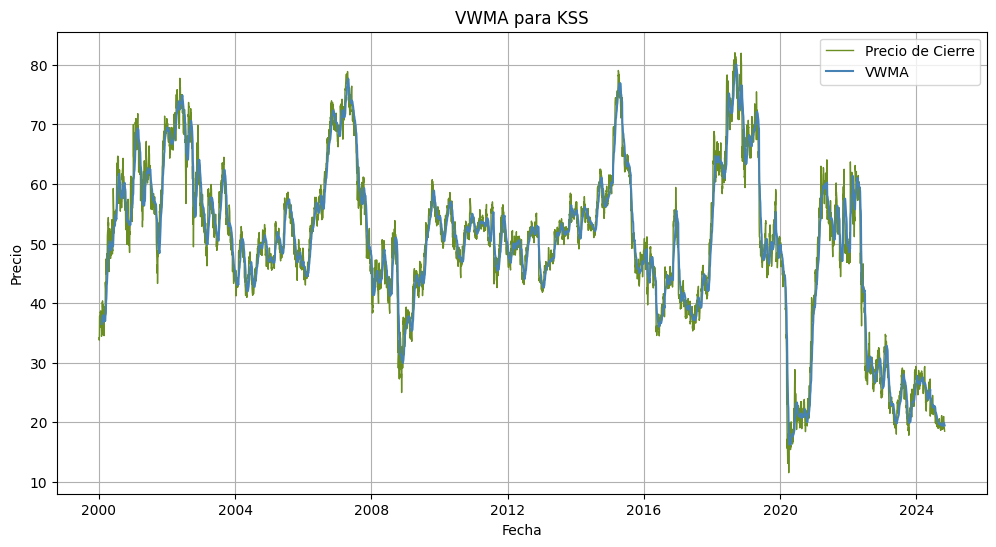

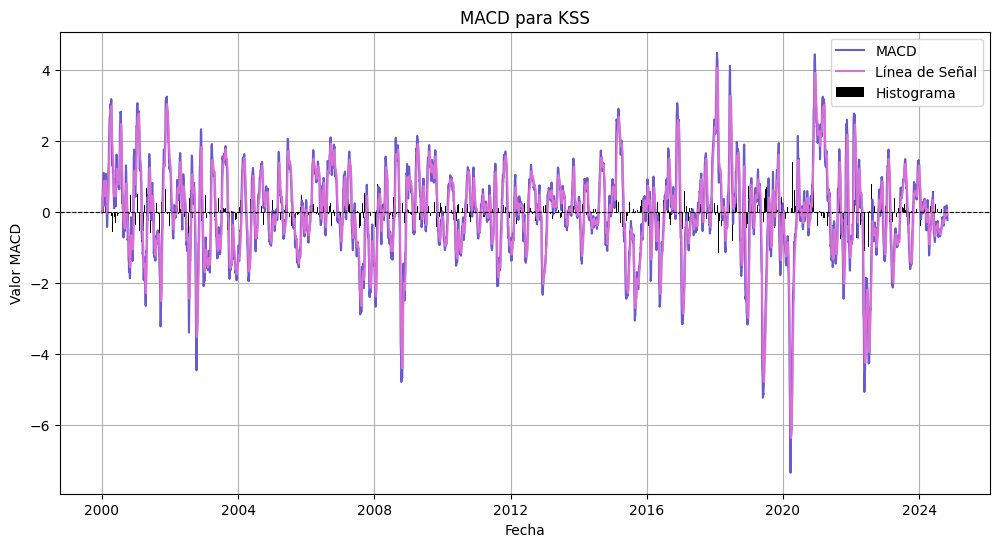


Seleccione una acción:
1. KSS
2. BBY
3. GM
0. Salir
Ingrese el número correspondiente a la acción: 0


In [21]:
acciones = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

def indicadores(symbol, start_date, end_date, window_c):

    df = yf.download(symbol, start=start_date, end=end_date)

    df['VWMA'] = (
        (df['Close'] * df['Volume']).rolling(window=window_c).sum() / df['Volume'].rolling(window=window_c).sum()
    )

    df['EMA_1'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_2'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_1'] - df['EMA_2']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['Histograma'] = df['MACD'] - df['Signal_Line']

    return df

def graficar_vwma(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Precio de Cierre', color='olivedrab', linewidth=1)
    plt.plot(df['VWMA'], label='VWMA', color='steelblue', linewidth=1.5)
    plt.title(f"VWMA para {symbol}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.show()

def graficar_macd(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df['MACD'], label='MACD', color='slateblue', linewidth=1.5)
    plt.plot(df['Signal_Line'], label='Línea de Señal', color='orchid', linestyle='-')
    plt.bar(df.index, df['Histograma'], label='Histograma', color='black', linewidth=1.5)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title(f"MACD para {symbol}")
    plt.xlabel("Fecha")
    plt.ylabel("Valor MACD")
    plt.legend()
    plt.grid(True)
    plt.show()

while True:
    print("\nSeleccione una acción:")
    for i, accion in enumerate(acciones):
        print(f"{i + 1}. {accion}")
    print("0. Salir")

    opcion = input("Ingrese el número correspondiente a la acción: ")
    if opcion == '0':
        break

    try:
        opcion = int(opcion)
        if 1 <= opcion <= len(acciones):
            symbol = acciones[opcion - 1]
            df = indicadores(symbol, start_date, end_date, window_c=20)

            print(f"\nÚltimos valores para {symbol}:")
            print(df[['Close', 'VWMA', 'MACD', 'Signal_Line']].tail())

            # Graficar indicadores
            graficar_vwma(df, symbol)
            graficar_macd(df, symbol)
        else:
            print("Por favor, seleccione otra opción válida.")
    except ValueError:
        print("Ingrese un número.")
